In [2]:
import pandas as pd
df = pd.read_csv(r"D:\analys data pengangguran for learn\Tingkat Pengangguran Terbuka Menurut Provinsi, 2025.csv")
df.head()

,38 Provinsi,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Tingkat Pengangguran Terbuka Menurut Provinsi ...,NaN,NaN
1,NaN,2025,NaN,NaN
2,NaN,Februari,Agustus,Tahunan
3,ACEH,5.5,-,-
4,SUMATERA UTARA,5.05,-,-


In [ ]:
df.info()

In [3]:
df.describe()

,38 Provinsi,Unnamed: 1,Unnamed: 2,Unnamed: 3
count,39,42,40,40
unique,39,42,2,2
top,ACEH,Tingkat Pengangguran Terbuka Menurut Provinsi ...,-,-
freq,1,1,39,39


In [7]:
print(df.head(15))

             38 Provinsi                                         Unnamed: 1  \
0                    NaN  Tingkat Pengangguran Terbuka Menurut Provinsi ...   
1                    NaN                                               2025   
2                    NaN                                           Februari   
3                   ACEH                                                5.5   
4         SUMATERA UTARA                                               5.05   
5         SUMATERA BARAT                                               5.69   
6                   RIAU                                               4.12   
7                  JAMBI                                               4.48   
8       SUMATERA SELATAN                                               3.89   
9               BENGKULU                                               3.24   
10               LAMPUNG                                               4.07   
11  KEP. BANGKA BELITUNG                            

In [3]:
# Skip baris atas yang bukan data, ambil mulai baris ke-3 (index = 3)
df = pd.read_csv(r"D:\analys data pengangguran for learn\Tingkat Pengangguran Terbuka Menurut Provinsi, 2025.csv", skiprows=3)

# Ambil hanya kolom yang dibutuhkan: kolom pertama dan kedua
df = df.iloc[:, [0, 1]]

# Ganti nama kolom jadi lebih jelas
df.columns = ['Provinsi', 'Tingkat Pengangguran (%)']

# Hapus baris-baris yang kosong (jika ada)
df = df.dropna()

#jika ingin menghapus baris tertentu seperti baris indonesai pada index terakhir
#hapus baris dengan provinsi == "INDONESIA"
df = df[df['Provinsi'].str.upper() !='INDONESIA'].reset_index(drop=True)

# Tampilkan hasil bersih
print(df.head())


         Provinsi  Tingkat Pengangguran (%)
0            ACEH                      5.50
1  SUMATERA UTARA                      5.05
2  SUMATERA BARAT                      5.69
3            RIAU                      4.12
4           JAMBI                      4.48


In [29]:
# Ubah tipe datanya jadi float
df['Tingkat Pengangguran (%)'] = df['Tingkat Pengangguran (%)'].astype(float)

# Cek hasilnya
print(df.dtypes)

Provinsi                     object
Tingkat Pengangguran (%)    float64
dtype: object


In [31]:
# Hitung rata-rata tingkat pengangguran seluruh provinsi

rata_rata = df['Tingkat Pengangguran (%)'].mean()
print(f"Rata-rata tingkat pengangguran nasional: {rata_rata:.2f}%")

# Tambahkan kolom ranking berdasarkan tingkat pengangguran, dari tertinggi ke terendah
df['Ranking'] = df['Tingkat Pengangguran (%)'].rank(ascending=False).astype(int)



Rata-rata tingkat pengangguran nasional: 4.43%


In [18]:
# Cari provinsi dengan pengangguran tertinggi
max_row = df.loc[df['Tingkat Pengangguran (%)'].idxmax()]
print(f"Pengangguran tertinggi: {max_row['Provinsi']} ({max_row['Tingkat Pengangguran (%)']}%)")

# Cari provinsi dengan pengangguran terendah
min_row = df.loc[df['Tingkat Pengangguran (%)'].idxmin()]
print(f"Pengangguran terendah: {min_row['Provinsi']} ({min_row['Tingkat Pengangguran (%)']}%)")


Pengangguran tertinggi: PAPUA (6.92%)
Pengangguran terendah: BALI (1.58%)


Penjelasan:
.mean() → menghitung rata-rata

.idxmax() → ambil indeks dengan nilai maksimum

.loc[...] → akses baris berdasarkan indeks

In [19]:
# Import modul untuk export Excel
import pandas as pd

# Buat DataFrame untuk analisis
analisis_df = pd.DataFrame({
    'Keterangan': ['Rata-rata Nasional', 'Tertinggi', 'Terendah'],
    'Provinsi': ['-', max_row['Provinsi'], min_row['Provinsi']],
    'Tingkat Pengangguran (%)': [rata_rata, max_row['Tingkat Pengangguran (%)'], min_row['Tingkat Pengangguran (%)']]
})

# Export ke file Excel dengan dua sheet
with pd.ExcelWriter('hasil_analisis_pengangguran.xlsx') as writer:
    df.to_excel(writer, sheet_name='Data Pengangguran', index=False)
    analisis_df.to_excel(writer, sheet_name='Analisis', index=False)


Penjelasan:
pd.ExcelWriter() digunakan untuk membuat file Excel dengan multi-sheet

df.to_excel() → menyimpan DataFrame ke sheet tertentu

index=False → agar index baris tidak ikut disimpan

Setelah kamu jalankan:

Akan muncul file hasil_analisis_pengangguran.xlsx di folder kerja kamu.

Coba buka dan lihat apakah 2 sheet muncul dengan benar

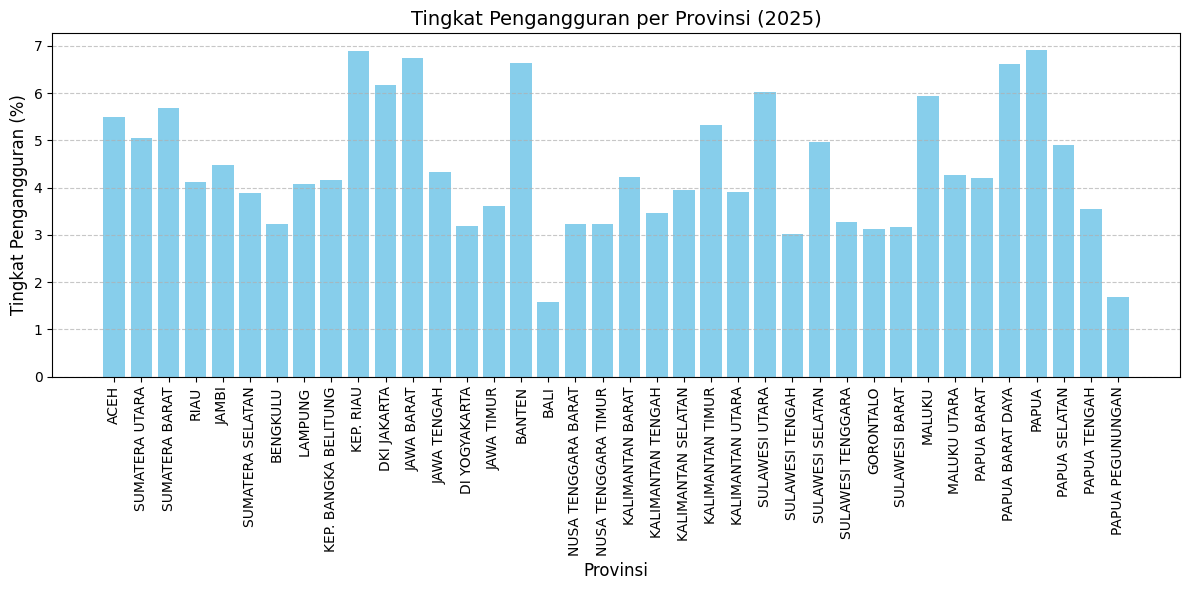

In [31]:
import matplotlib.pyplot as plt

# Atur ukuran grafik agar lebar dan mudah dibaca
plt.figure(figsize=(12, 6))

# Buat grafik batang
plt.bar(df['Provinsi'], df['Tingkat Pengangguran (%)'], color='skyblue')

# Tambahkan judul dan label sumbu
plt.title('Tingkat Pengangguran per Provinsi (2025)', fontsize=14)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Tingkat Pengangguran (%)', fontsize=12)

# Rotasi nama provinsi agar tidak bertumpuk
plt.xticks(rotation=90)

# Tampilkan grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.tight_layout()
plt.show()


 Penjelasan:
plt.bar(...) → membuat grafik batang

figsize=(12, 6) → ukuran grafik

xticks(rotation=90) → agar nama provinsi tidak saling tumpuk

tight_layout() → menyesuaikan margin otomatis agar tidak terpotong

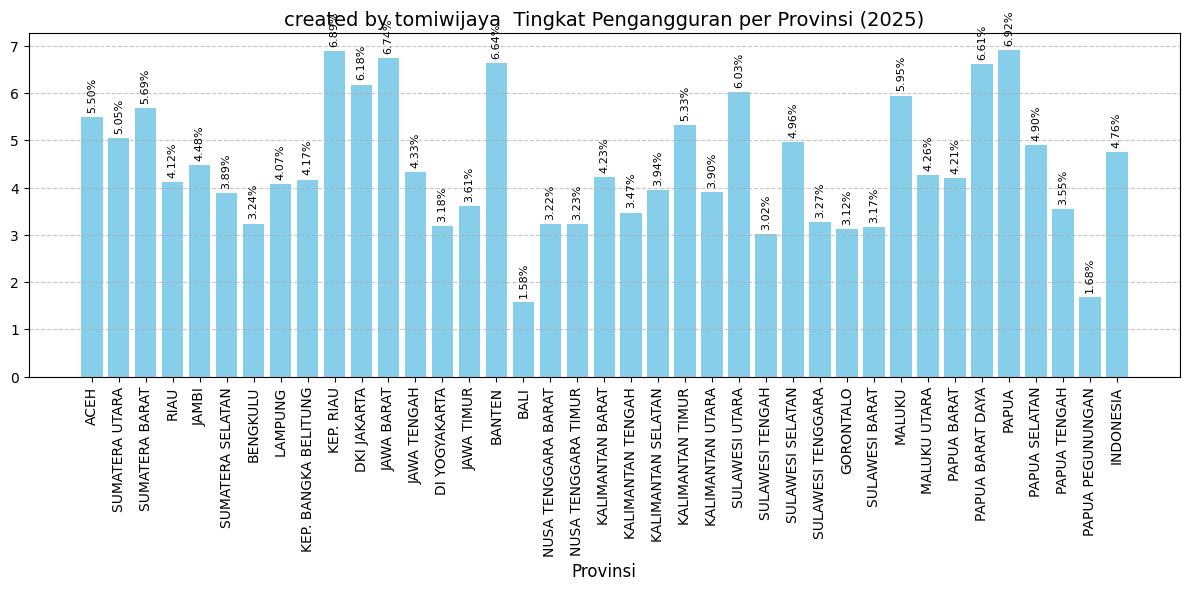

In [22]:
#TAMBAHKAN ANGKA GRAFIK DANSIMPAN KE GAMBAR .PNG
import matplotlib.pyplot as plt

#atur ukuran grafik
plt.figure(figsize=(12, 6))

#buat grafik batang
bars = plt.bar(df['Provinsi'], df['Tingkat Pengangguran (%)'], color='skyblue')

#tambahkann angka di setiap batang 
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.2f}%',ha='center', va='bottom', 
             fontsize=8, rotation=90)

#Tambahkan judul dan label
plt.title('created by tomiwijaya  Tingkat Pengangguran per Provinsi (2025)', fontsize=14)
plt.xlabel('Provinsi', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#tata letak otomaatis
plt.tight_layout()

#simpan sebagai gambar PNG
plt.savefig('grafik_pengangguran_per_provinsi.png', dpi=300)

#Tampilkan grafik
plt.show()

Penjelasan:
plt.text(...) → menempatkan teks di atas tiap batang

ha='center' → teks rata tengah

height + 0.1 → sedikit di atas batang

plt.savefig(...) → menyimpan gambar ke file PNG dengan resolusi tinggi (dpi=300)

In [34]:
import pandas as pd

#MENGURUTKAN DATA DARI PENGANGGURAN TERTINGGI KE TERENDAH
df_sorted = df.sort_values(by='Tingkat Pengangguran (%)', ascending=False)

#Tampilkan 10 provinsi teratas
print("10 provinsi dengan pengangguran Tertinggi: ")
print(df_sorted.head(10))

10 provinsi dengan pengangguran Tertinggi: 
            Provinsi  Tingkat Pengangguran (%)
34             PAPUA                      6.92
9          KEP. RIAU                      6.89
11        JAWA BARAT                      6.74
15            BANTEN                      6.64
33  PAPUA BARAT DAYA                      6.61
10       DKI JAKARTA                      6.18
24    SULAWESI UTARA                      6.03
30            MALUKU                      5.95
2     SUMATERA BARAT                      5.69
0               ACEH                      5.50


💡 Penjelasan:
.sort_values() → mengurutkan berdasarkan kolom tertentu

ascending=False → urut dari besar ke kecil

head(10) → hanya tampilkan 10 teratas

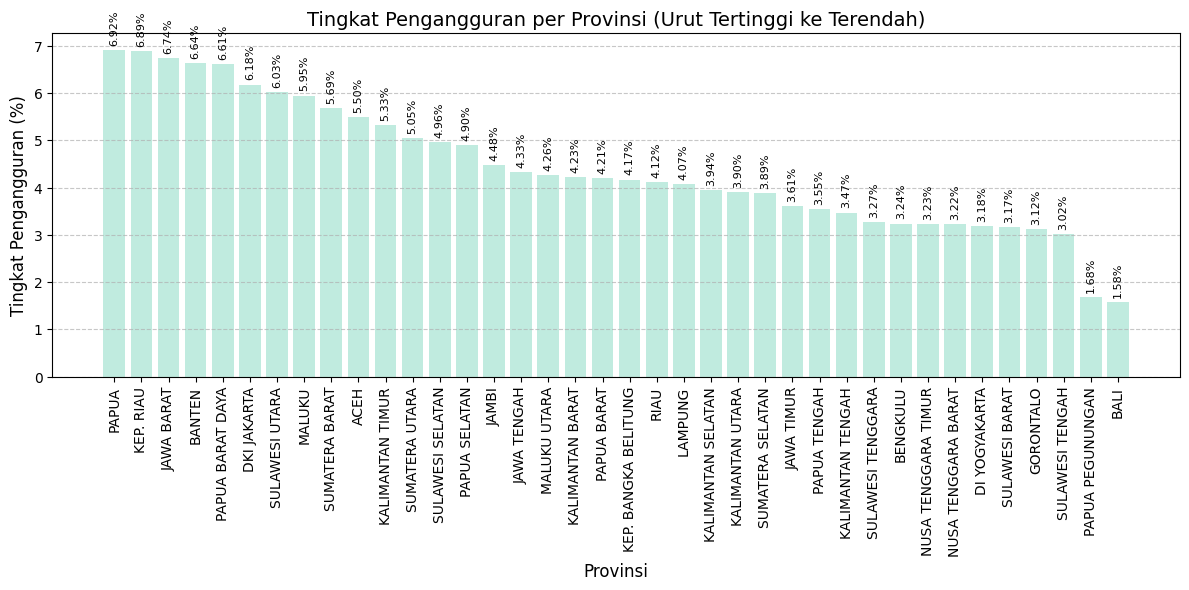

In [35]:
import matplotlib.pyplot as plt

# Atur ukuran grafik
plt.figure(figsize=(12, 6))

# Buat grafik batang dari data yang sudah diurutkan
bars = plt.bar(df_sorted['Provinsi'], df_sorted['Tingkat Pengangguran (%)'], color='#c0ebdf')

# Tambahkan angka di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=8, rotation=90)

# Judul dan label
plt.title('Tingkat Pengangguran per Provinsi (Urut Tertinggi ke Terendah)', fontsize=14)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Tingkat Pengangguran (%)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rapiin layout
plt.tight_layout()

# Simpan ke PNG
plt.savefig('grafik_pengangguran_urut.png', dpi=300)

# Tampilkan grafik
plt.show()


In [36]:
#menambahkan kolom rangking

#salin data yang sudah diurutkan sebelumnya
df_ranking = df_sorted.copy()

# Tambahkan kolom 'ranking' (mulai 1)
df_ranking['Ranking'] = range(1, len(df_ranking) + 1)

#tampilkan 10 provinsi teratas
print(df_ranking.head(10))

            Provinsi  Tingkat Pengangguran (%)  Ranking
34             PAPUA                      6.92        1
9          KEP. RIAU                      6.89        2
11        JAWA BARAT                      6.74        3
15            BANTEN                      6.64        4
33  PAPUA BARAT DAYA                      6.61        5
10       DKI JAKARTA                      6.18        6
24    SULAWESI UTARA                      6.03        7
30            MALUKU                      5.95        8
2     SUMATERA BARAT                      5.69        9
0               ACEH                      5.50       10


Penjelasan:
df_sorted.copy() → kita buat salinan supaya tidak mengubah data aslinya.

range(1, len(df) + 1) → buat angka dari 1 sampai jumlah provinsi.

df_ranking['Ranking'] → menambahkan kolom baru.



In [26]:
#SIMPAN RANKING KE FILE EXCEL BARU

#export data dengan ranking ke excel
df_ranking.to_excel('ranking_pengangguran.xlsx', index=False)

print("✅ File berhasil disimpan sebagai 'ranking_pengangguran.xlsx'")

✅ File berhasil disimpan sebagai 'ranking_pengangguran.xlsx'


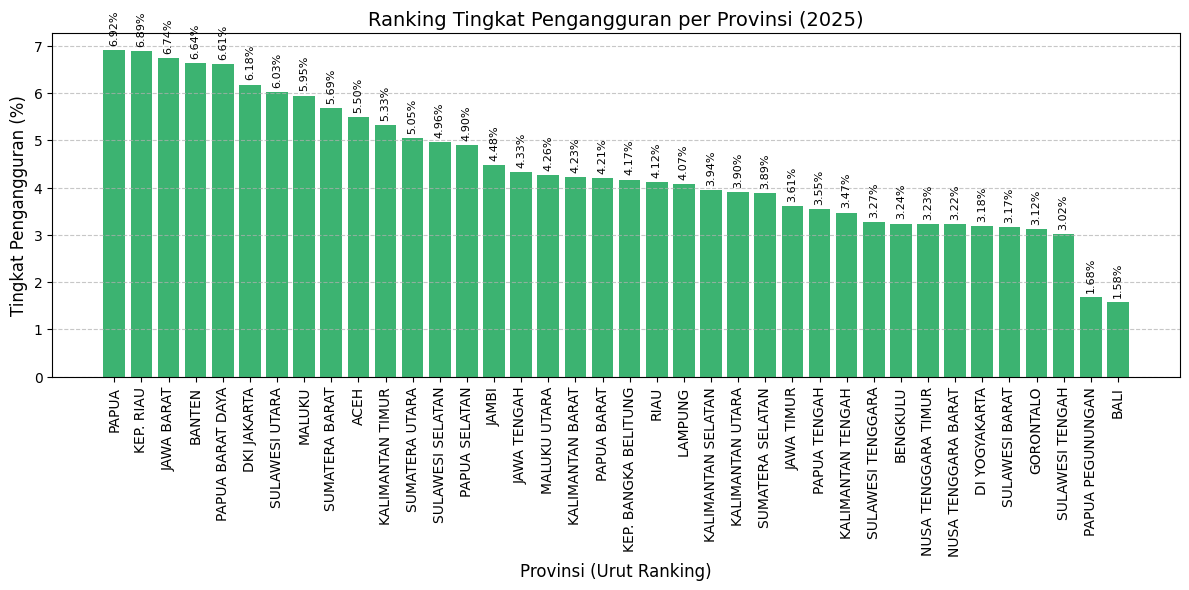

In [37]:
#GRAFIK RANKING PENGANGGURAN PER PROVINSI

import matplotlib.pyplot as plt

# Atur ukuran grafik
plt.figure(figsize=(12, 6))

# Buat grafik batang berdasarkan ranking (data sudah diurutkan)
bars = plt.bar(df_ranking['Provinsi'], df_ranking['Tingkat Pengangguran (%)'], color='mediumseagreen')

# Tambahkan nilai persentase di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=8, rotation=90)

# Judul dan label sumbu
plt.title('Ranking Tingkat Pengangguran per Provinsi (2025)', fontsize=14)
plt.xlabel('Provinsi (Urut Ranking)', fontsize=12)
plt.ylabel('Tingkat Pengangguran (%)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rapiin layout & simpan ke PNG
plt.tight_layout()
plt.savefig('grafik_ranking_pengangguran.png', dpi=300)

# Tampilkan grafik
plt.show()


In [39]:
#print(df['Provinsi'].unique()) #untuk mengecek semua baris yang ada di kolom "Provinsi"

In [41]:
#kita akan melakukan analisis berapa provinsi yang berada di atas dan di bawah rata-rata nasional.

#hitung ulang rata-rata nasional (untuk jaga-jaga)
rata_rata = df['Tingkat Pengangguran (%)'].mean()

#provinsi dengan pengangguran di atas rata-rata nasional
di_atas = df[df['Tingkat Pengangguran (%)'] > rata_rata]

#provinsi dengan pengangguran di bawah rata-rata nasional
di_bawah = df[df['Tingkat Pengangguran (%)'] < rata_rata]

#tampilkan jumlah nya
print(f"jumlah provinsi di atas rata-rata nasional : {len(di_atas)}")
print(f"jumlah provinsi di bawah rata-rata nasional: {len(di_bawah)}")


jumlah provinsi di atas rata-rata nasional : 15
jumlah provinsi di bawah rata-rata nasional: 23


In [11]:
#menampilkan dengan tingkat pengangguran di atas rata-rata nasional
#menampilkan dengan tingkat pengangguran di bawah rata-rata

#hitung rata-rata lagi untuk konteks
rata_rata = df['Tingkat Pengangguran (%)'].mean()

#provinsi di atas rata-rata
print("🟥 Provinsi di ATAS rata-rata nasional:")
print(df[df['Tingkat Pengangguran (%)'] > rata_rata]
    [['Provinsi', 'Tingkat Pengangguran (%)']].sort_values(by='Tingkat Pengangguran (%)', ascending=False))

print("\n🟩 Provinsi di BAWAH rata-rata nasional:")
print(df[df['Tingkat Pengangguran (%)'] < rata_rata]
    [['Provinsi', 'Tingkat Pengangguran (%)']].sort_values(by='Tingkat Pengangguran (%)', ascending=False))

🟥 Provinsi di ATAS rata-rata nasional:
            Provinsi  Tingkat Pengangguran (%)
34             PAPUA                      6.92
9          KEP. RIAU                      6.89
11        JAWA BARAT                      6.74
15            BANTEN                      6.64
33  PAPUA BARAT DAYA                      6.61
10       DKI JAKARTA                      6.18
24    SULAWESI UTARA                      6.03
30            MALUKU                      5.95
2     SUMATERA BARAT                      5.69
0               ACEH                      5.50
22  KALIMANTAN TIMUR                      5.33
1     SUMATERA UTARA                      5.05
26  SULAWESI SELATAN                      4.96
35     PAPUA SELATAN                      4.90
4              JAMBI                      4.48

🟩 Provinsi di BAWAH rata-rata nasional:
                Provinsi  Tingkat Pengangguran (%)
12           JAWA TENGAH                      4.33
31          MALUKU UTARA                      4.26
19      KALIMAN

In [5]:
#simpan data pengangguran di atas rata-rata dan di bawah rata-rata ke excel
#sheet 1 = di atas rata-rata 
#sheet 2 = di atas rata-rata

import pandas as pd

#hitung ulang rata-rata nasional
rata_rata = df['Tingkat Pengangguran (%)'].mean()

#pisahkan data ke dua grup
di_atas = df[df['Tingkat Pengangguran (%)'] > rata_rata].sort_values(by='Tingkat Pengangguran (%)', ascending=False)
di_bawah = df[df['Tingkat Pengangguran (%)'] < rata_rata].sort_values(by='Tingkat Pengangguran (%)', ascending=False)

#simpan ke file excel dengan dua sheet
with pd.ExcelWriter('daftar pengangguran di atas dan di bawah rata-rata.xlsx') as writer:
    di_atas.to_excel(writer, sheet_name='Di atas rata-rata', index=False)
    di_bawah.to_excel(writer, sheet_name='Di bawah rata-rata', index=False)

In [8]:
#sheet ketiga (seluruh Provinsi + Ranking)
#buat kolom ranking berdasarkan urutan tingkat pengangguran (tinggi ke rendah)

df_ranking = df.copy()
df_ranking['Ranking'] = df_ranking['Tingkat Pengangguran (%)'].rank(ascending=False, method='min').astype(int)
df_ranking =  df_ranking.sort_values(by='Ranking')

#simpan ulang ke excel dengan 3 sheet
with pd.ExcelWriter('daftar pengangguran di atas dan di bawah rata-rata.xlsx') as writer:
    di_atas.to_excel(writer, sheet_name='Di atas rata-rata', index=False)
    di_bawah.to_excel(writer, sheet_name='Di bawah rata-rata', index=False)
    df_ranking.to_excel(writer, sheet_name='Ranking Lengkap', index=False)

✅ Pilihan Visualisasi Lanjutan
1. Pie Chart
Menampilkan proporsi jumlah provinsi:

Di atas rata-rata

Di bawah rata-rata

Contoh hasil:
🟩 23 provinsi di bawah rata-rata
🟥 15 provinsi di atas rata-rata

2. Boxplot
Menunjukkan sebaran data pengangguran:

Minimum, maksimum

Median

Quartile (Q1 dan Q3)

Outlier jika ada


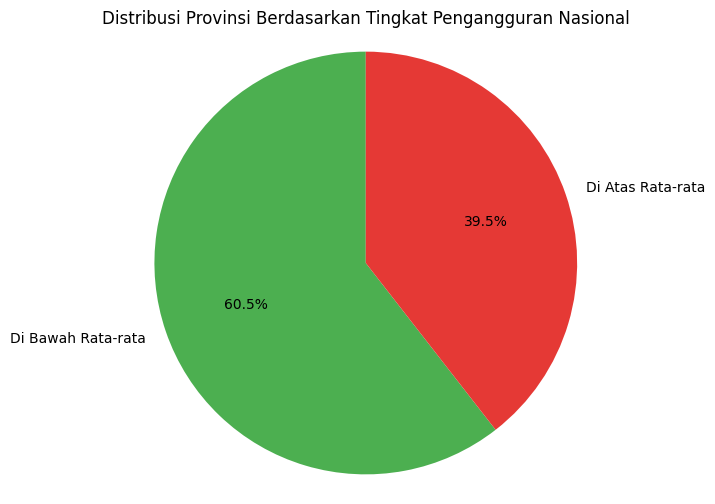

In [12]:
#pie chart

import matplotlib.pyplot as plt

#data jumlah
labels = ['Di Bawah Rata-rata', 'Di Atas Rata-rata']
counts = [23, 15]
colors = ['#4CAF50', '#E53935']  # hijau & merah

#plot
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribusi Provinsi Berdasarkan Tingkat Pengangguran Nasional')
plt.axis('equal')

#simpan
plt.savefig('grafik_pie_pengangguran.png', dpi=300)
plt.show()

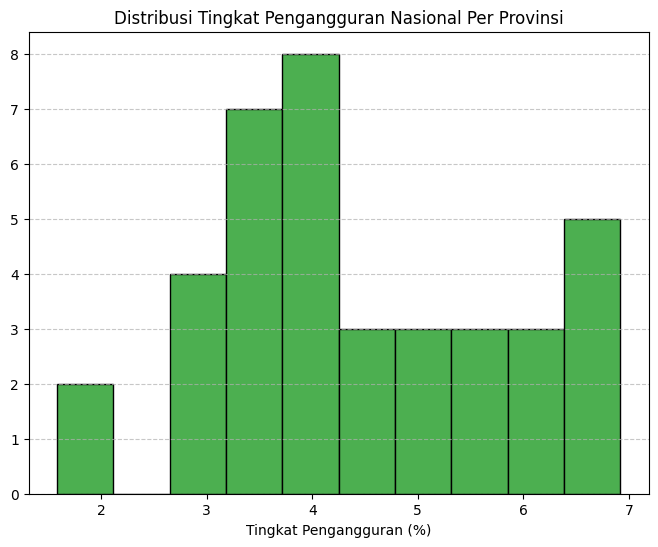

In [14]:
#Histogram Tingkat Pengangguran

plt.figure(figsize=(8, 6))
plt.hist(df['Tingkat Pengangguran (%)'], bins=10, color='#4CAF50', edgecolor='black')

plt.title('Distribusi Tingkat Pengangguran Nasional Per Provinsi')
plt.xlabel('Tingkat Pengangguran (%)')

plt.grid(axis='y', linestyle='--', alpha=0.7)

#simpan grafik
plt.savefig('histogram_pengangguran.png', dpi=300)
plt.show()

#HEAT MAP

🧭 Langkah 1: Kelompokkan Provinsi Berdasarkan Pulau/Wilayah
Pertama, kita buat kolom baru Wilayah di DataFrame, lalu kelompokkan provinsi berdasarkan wilayah seperti:

Sumatera

Jawa

Kalimantan

Sulawesi

Bali & Nusa Tenggara

Maluku

Papua

python
Copy
Edit


In [15]:
# Buat dictionary wilayah
wilayah_dict = {
    'ACEH': 'Sumatera',
    'SUMATERA UTARA': 'Sumatera',
    'SUMATERA BARAT': 'Sumatera',
    'RIAU': 'Sumatera',
    'JAMBI': 'Sumatera',
    'SUMATERA SELATAN': 'Sumatera',
    'BENGKULU': 'Sumatera',
    'LAMPUNG': 'Sumatera',
    'KEP. BANGKA BELITUNG': 'Sumatera',
    'KEP. RIAU': 'Sumatera',

    'DKI JAKARTA': 'Jawa',
    'JAWA BARAT': 'Jawa',
    'JAWA TENGAH': 'Jawa',
    'DI YOGYAKARTA': 'Jawa',
    'JAWA TIMUR': 'Jawa',
    'BANTEN': 'Jawa',

    'KALIMANTAN BARAT': 'Kalimantan',
    'KALIMANTAN TENGAH': 'Kalimantan',
    'KALIMANTAN SELATAN': 'Kalimantan',
    'KALIMANTAN TIMUR': 'Kalimantan',
    'KALIMANTAN UTARA': 'Kalimantan',

    'SULAWESI UTARA': 'Sulawesi',
    'SULAWESI TENGAH': 'Sulawesi',
    'SULAWESI SELATAN': 'Sulawesi',
    'SULAWESI TENGGARA': 'Sulawesi',
    'GORONTALO': 'Sulawesi',
    'SULAWESI BARAT': 'Sulawesi',

    'BALI': 'Bali & Nusa Tenggara',
    'NUSA TENGGARA BARAT': 'Bali & Nusa Tenggara',
    'NUSA TENGGARA TIMUR': 'Bali & Nusa Tenggara',

    'MALUKU': 'Maluku',
    'MALUKU UTARA': 'Maluku',

    'PAPUA': 'Papua',
    'PAPUA BARAT': 'Papua',
    'PAPUA TENGAH': 'Papua',
    'PAPUA BARAT DAYA': 'Papua',
    'PAPUA SELATAN': 'Papua',
    'PAPUA PEGUNUNGAN': 'Papua'
}

# Tambahkan kolom wilayah
df['Wilayah'] = df['Provinsi'].map(wilayah_dict)


#Hitung rata-rata tiap wilayah
wilayah_avg = df.groupby('Wilayah')['Tingkat Pengangguran (%)'].mean().sort_values(ascending=False)

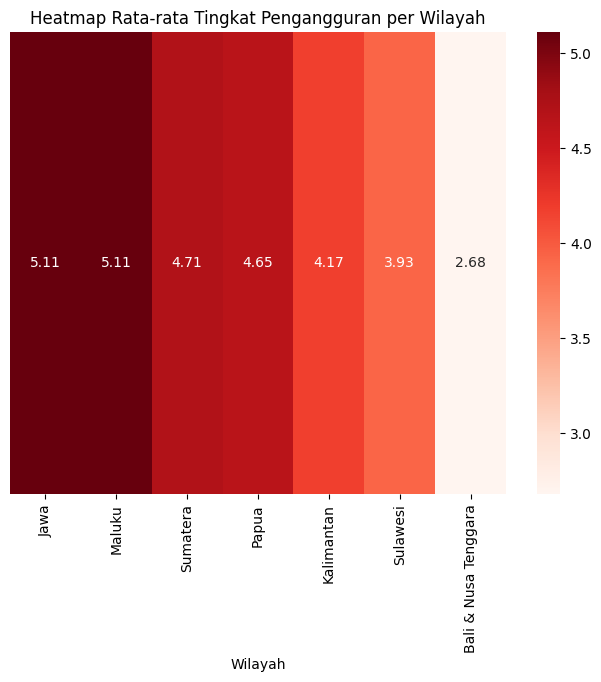

In [17]:
#Buat Heatmap

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(wilayah_avg.to_frame().T, annot=True, fmt=".2f", cmap='Reds', cbar=True)

plt.title('Heatmap Rata-rata Tingkat Pengangguran per Wilayah')
plt.yticks([])  #hapus label sumbu Y karena hanya 1 baris
plt.xlabel('Wilayah')

#simpan sebagai gambar
plt.savefig('heatmap_pengangguran_per_wilayah.png', dpi=300)
plt.show()

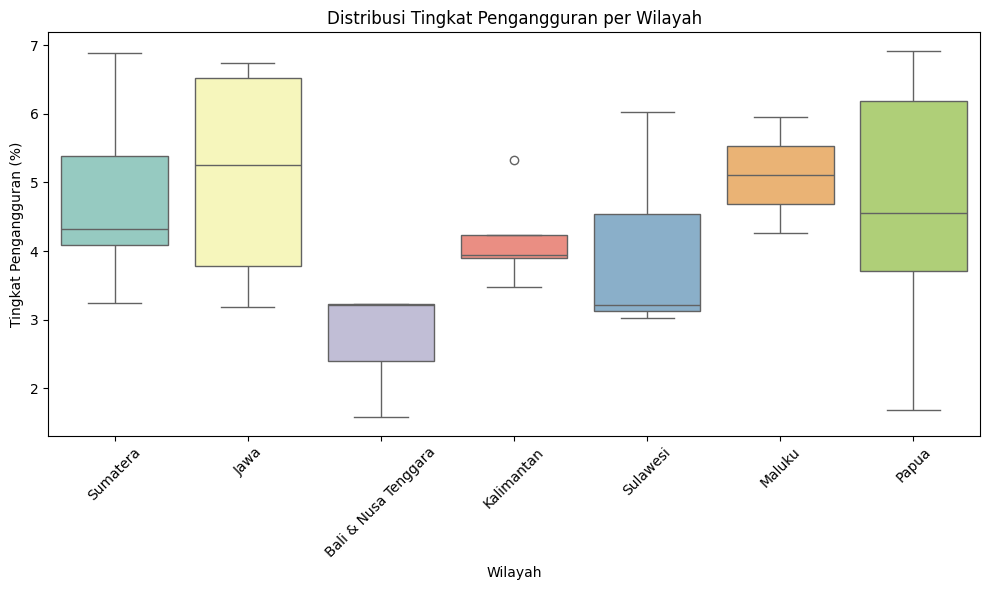

In [22]:
#Boxplot per Wilayah
#Melihat sebaran (distribusi)pengangguran di tiap wilayah

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Wilayah', y='Tingkat Pengangguran (%)', palette='Set3', legend=False, hue='Wilayah')
plt.title('Distribusi Tingkat Pengangguran per Wilayah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot_pengangguran_per_wilayah.png', dpi=300)
plt.show()

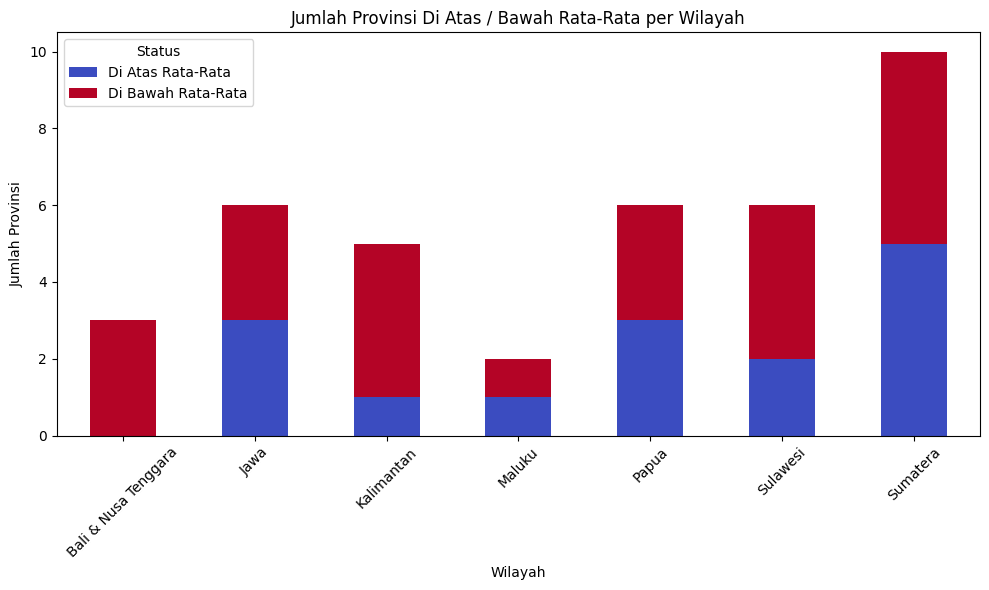

In [23]:
#Barplot Jumlah Provinsi di Atas/Bawah Rata-Rata per Wilayah

# Tambahkan kolom status
df['Status'] = df['Tingkat Pengangguran (%)'].apply(
    lambda x: 'Di Atas Rata-Rata' if x > rata_rata else 'Di Bawah Rata-Rata'
)

# Hitung jumlah per wilayah per status
status_per_wilayah = df.groupby(['Wilayah', 'Status']).size().unstack().fillna(0)

# Plot
status_per_wilayah.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Jumlah Provinsi Di Atas / Bawah Rata-Rata per Wilayah')
plt.ylabel('Jumlah Provinsi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('status_provinsi_per_wilayah.png', dpi=300)
plt.show()

#🔍 Makna:

Menunjukkan perbandingan sebaran kondisi pengangguran di setiap wilayah.


In [34]:

#Cara Tambah Kolom Wilayah ke DataFrame

def get_wilayah(provinsi):
    if provinsi in ['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI',
                    'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG',
                    'KEP. BANGKA BELITUNG', 'KEP. RIAU']:
        return 'Sumatera'
    elif provinsi in ['DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH',
                      'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN']:
        return 'Jawa'
    elif provinsi in ['BALI', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR']:
        return 'Bali & Nusa Tenggara'
    elif provinsi in ['KALIMANTAN BARAT', 'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN',
                      'KALIMANTAN TIMUR', 'KALIMANTAN UTARA']:
        return 'Kalimantan'
    elif provinsi in ['SULAWESI UTARA', 'SULAWESI TENGAH', 'SULAWESI SELATAN',
                      'SULAWESI TENGGARA', 'GORONTALO', 'SULAWESI BARAT']:
        return 'Sulawesi'
    elif provinsi in ['MALUKU', 'MALUKU UTARA']:
        return 'Maluku'
    elif provinsi in ['PAPUA', 'PAPUA BARAT', 'PAPUA BARAT DAYA', 'PAPUA SELATAN',
                      'PAPUA TENGAH', 'PAPUA PEGUNUNGAN']:
        return 'Papua'
    else:
        return 'Lainnya'

# Tambahkan kolom baru ke df
df['Wilayah'] = df['Provinsi'].apply(get_wilayah)


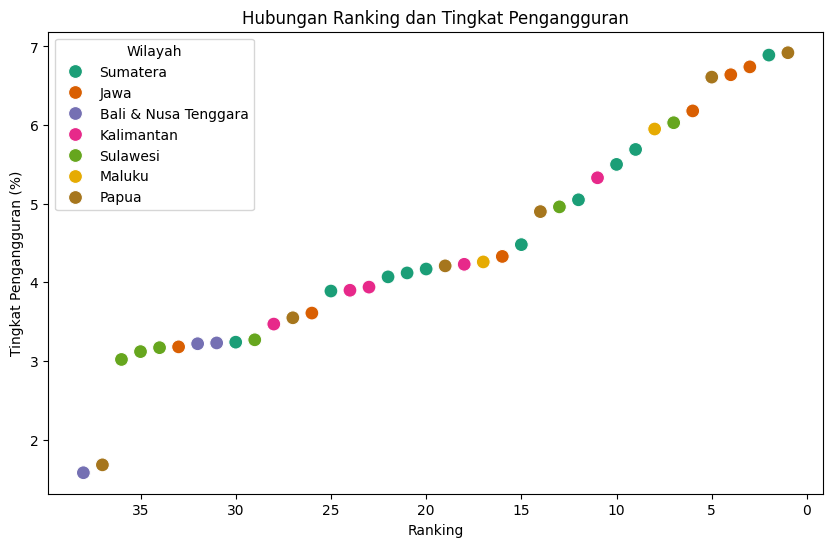

In [35]:
# Scatterplot: Ranking vs Pengangguran


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ranking', y='Tingkat Pengangguran (%)', hue='Wilayah', palette='Dark2', s=100)
plt.title('Hubungan Ranking dan Tingkat Pengangguran')
plt.gca().invert_xaxis()  # supaya ranking 1 di kiri
plt.savefig('scatter_ranking_pengangguran.png', dpi=300)
plt.show()
